<a href="https://colab.research.google.com/github/DomcoSF/Pandas_Learning/blob/main/agregacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_produto = pd.read_csv('/content/produto.csv')

In [3]:
df_produto

,descItem,vlPreco
0,abacate,5.25
1,abacaxi,2.50
2,abobrinha,2.00
3,alcaparra,3.00
4,alho,1.00
...,...,...
80,tomate,1.50
81,tomate seco,6.25
82,uva passa,3.75
83,vinho tinto,12.00


In [7]:
df_produto['vlPrecoInfla'] = (df_produto['vlPreco'] * 1.09).round(2)
df_produto.describe()

,vlPreco,vlPrecoInfla
count,85.000000,85.000000
mean,4.382353,4.776941
std,2.916708,3.179093
min,0.000000,0.000000
25%,2.500000,2.720000
50%,3.500000,3.820000
75%,6.000000,6.540000
max,13.750000,14.990000


In [8]:
df_produto['descItemPrimeiro'] = df_produto['descItem'].apply(lambda x:x.lower().split(" ")[0])

In [11]:
df_produto[['descItem','descItemPrimeiro']].describe()

,descItem,descItemPrimeiro
count,85,85
unique,85,65
top,abacate,queijo
freq,1,8


In [12]:
pd.value_counts(df_produto['descItemPrimeiro'])

queijo       8
massa        4
suco         4
pimentão     2
anchova      2
            ..
cream        1
ervilha      1
espinafre    1
frango       1
água         1
Name: descItemPrimeiro, Length: 65, dtype: int64

Text(0, 0.5, 'Frequencia')

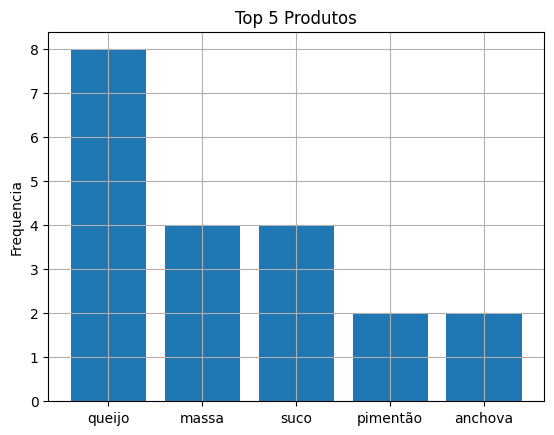

In [18]:
freq_itens = pd.value_counts(df_produto['descItemPrimeiro'])
plt.bar(freq_itens.index[:5], freq_itens.values[:5])
plt.grid(True)
plt.title("Top 5 Produtos")
plt.ylabel("Frequencia")

In [22]:
 df_produto.groupby(by=['descItemPrimeiro'])['vlPreco','vlPrecoInfla'].mean()

<ipython-input-22-f1c7ee20a3ac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_produto.groupby(by=['descItemPrimeiro'])['vlPreco','vlPrecoInfla'].mean()


,vlPreco,vlPrecoInfla
descItemPrimeiro,,
abacate,5.250,5.720
abacaxi,2.500,2.720
abobrinha,2.000,2.180
alcaparra,3.000,3.270
alho,1.000,1.090
...,...,...
tofu,2.500,2.720
tomate,3.875,4.225
uva,3.750,4.090


In [23]:
 df_produto.groupby(by=['descItemPrimeiro'])['vlPreco','vlPrecoInfla'].describe()

<ipython-input-23-f2b092ef3bb9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_produto.groupby(by=['descItemPrimeiro'])['vlPreco','vlPrecoInfla'].describe()


vlPreco                                                     \
                   count    mean       std    min      25%     50%      75%   
descItemPrimeiro                                                              
abacate              1.0   5.250       NaN   5.25   5.2500   5.250   5.2500   
abacaxi              1.0   2.500       NaN   2.50   2.5000   2.500   2.5000   
abobrinha            1.0   2.000       NaN   2.00   2.0000   2.000   2.0000   
alcaparra            1.0   3.000       NaN   3.00   3.0000   3.000   3.0000   
alho                 1.0   1.000       NaN   1.00   1.0000   1.000   1.0000   
...                  ...     ...       ...    ...      ...     ...      ...   
tofu                 1.0   2.500       NaN   2.50   2.5000   2.500   2.5000   
tomate               2.0   3.875  3.358757   1.50   2.6875   3.875   5.0625   
uva                  1.0   3.750       NaN   3.75   3.7500   3.750   3.7500   
vinho                1.0  12.000       NaN  12.00  12.0000  12.000  12.0000   
água                 1.0   5.000       NaN   5.00   5.0000   5.000   5.0000   

                        vlPrecoInfla                                    \
                    max        count    mean       std    min      25%   
descItemPrimeiro                                                         
abacate            5.25          1.0   5.720       NaN   5.72   5.7200   
abacaxi            2.50          1.0   2.720       NaN   2.72   2.7200   
abobrinha          2.00          1.0   2.180       NaN   2.18   2.1800   
alcaparra          3.00          1.0   3.270       NaN   3.27   3.2700   
alho               1.00          1.0   1.090       NaN   1.09   1.0900   
...                 ...          ...     ...       ...    ...      ...   
tofu               2.50          1.0   2.720       NaN   2.72   2.7200   
tomate             6.25          2.0   4.225  3.655742   1.64   2.9325   
uva                3.75          1.0   4.090       NaN   4.09   4.0900   
vinho             12.00          1.0  13.080       NaN  13.08  13.0800   
água               5.00          1.0   5.450       NaN   5.45   5.4500   

                                          
                     50%      75%    max  
descItemPrimeiro                          
abacate            5.720   5.7200   5.72  
abacaxi            2.720   2.7200   2.72  
abobrinha          2.180   2.1800   2.18  
alcaparra          3.270   3.2700   3.27  
alho               1.090   1.0900   1.09  
...                  ...      ...    ...  
tofu               2.720   2.7200   2.72  
tomate             4.225   5.5175   6.81  
uva                4.090   4.0900   4.09  
vinho             13.080  13.0800  13.08  
água               5.450   5.4500   5.45  

[65 rows x 16 columns]

In [25]:
 df_produto.groupby(by=['descItemPrimeiro']).agg({"vlPreco":['mean','min','max']})

vlPreco              
                    mean    min    max
descItemPrimeiro                      
abacate            5.250   5.25   5.25
abacaxi            2.500   2.50   2.50
abobrinha          2.000   2.00   2.00
alcaparra          3.000   3.00   3.00
alho               1.000   1.00   1.00
...                  ...    ...    ...
tofu               2.500   2.50   2.50
tomate             3.875   1.50   6.25
uva                3.750   3.75   3.75
vinho             12.000  12.00  12.00
água               5.000   5.00   5.00

[65 rows x 3 columns]

In [26]:
 df_produto.groupby(by=['descItemPrimeiro'])[['vlPreco','vlPrecoInfla']].agg(['mean','min','max'])

vlPreco               vlPrecoInfla              
                    mean    min    max         mean    min    max
descItemPrimeiro                                                 
abacate            5.250   5.25   5.25        5.720   5.72   5.72
abacaxi            2.500   2.50   2.50        2.720   2.72   2.72
abobrinha          2.000   2.00   2.00        2.180   2.18   2.18
alcaparra          3.000   3.00   3.00        3.270   3.27   3.27
alho               1.000   1.00   1.00        1.090   1.09   1.09
...                  ...    ...    ...          ...    ...    ...
tofu               2.500   2.50   2.50        2.720   2.72   2.72
tomate             3.875   1.50   6.25        4.225   1.64   6.81
uva                3.750   3.75   3.75        4.090   4.09   4.09
vinho             12.000  12.00  12.00       13.080  13.08  13.08
água               5.000   5.00   5.00        5.450   5.45   5.45

[65 rows x 6 columns]